### Seaborn - HighQuality Graph
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버전

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
sns.set_style('darkgrid')

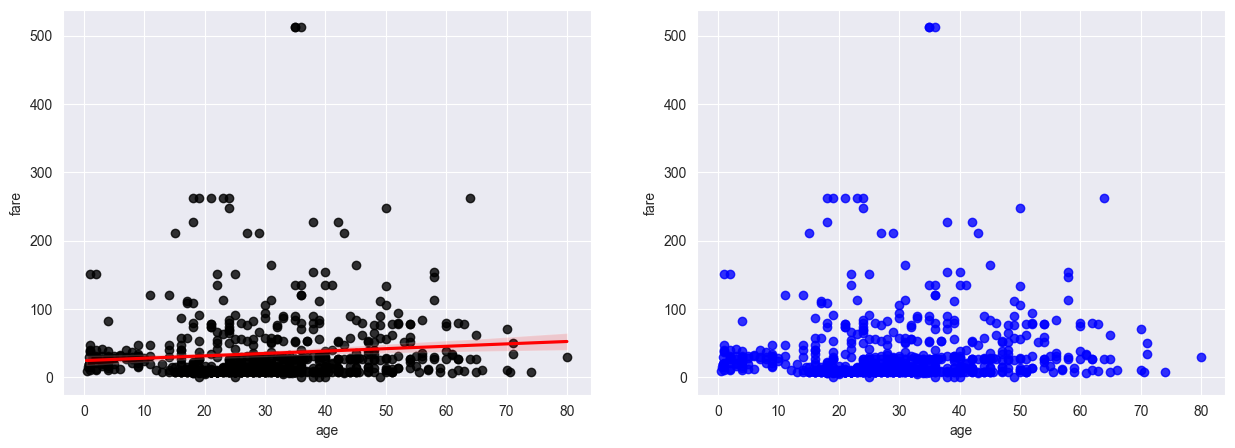

In [12]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 1  regplot = regression
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    scatter_kws = {'color' : 'black'}, # scatter color
    line_kws = {'color':'red'}, # regression line color
    # alpha = 0.3, # 앤 안되네
    fit_reg = True, # < default value
    ax = ax1
)

# 2  fit_reg = False
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    scatter_kws = {'color' : 'blue'}, # scatter color
    # line_kws = {'color':'red'}, # regression line color
    # alpha = 0.3, # 앤 안되네
    fit_reg = False, # < default value
    ax = ax2
)
plt.show()

---
### Histogram / Kernel Density Estimation(KDE) 커널 밀도 그래프
: (KDE)는 그래프와 x축 사이의 면적이 1이 되도록 긜는 밀도 분포 함수

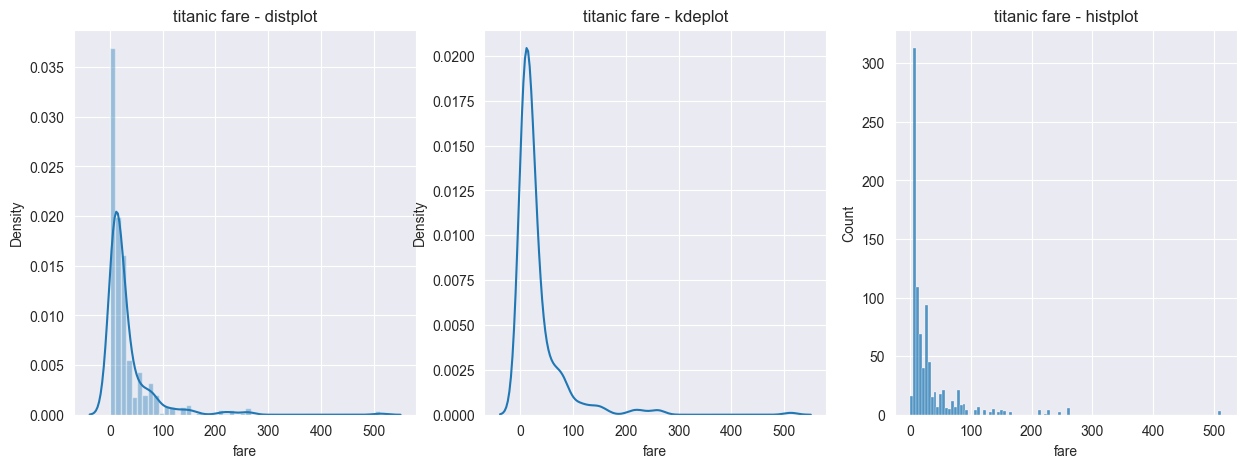

In [24]:
# 
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot(Histogram / kernel Density)
sns.distplot(titanic['fare'],ax = ax1) # 상대분포 
ax1.set_title('titanic fare - distplot')
# 
# kdeplot (kernel density)
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)
ax2.set_title('titanic fare - kdeplot')

# histogram
sns.histplot(x = 'fare' , data = titanic, ax = ax3 )
ax3.set_title('titanic fare - histplot')

plt.show()

fare는 $100 미만에 집중되어 있다.

---
### Heat Map
- 2개의 범주형 변수를 각각 x,y 축에 놓고 데이터를 매트릭스 형태로 분류

In [25]:
table = titanic.pivot_table(index = ['sex'], columns=['class'], aggfunc='size')
# aggfunc = 'size' : data값의 크기를 기준으로 집계 한다. count 해주는거라고 생각해도 될듯 .? 
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


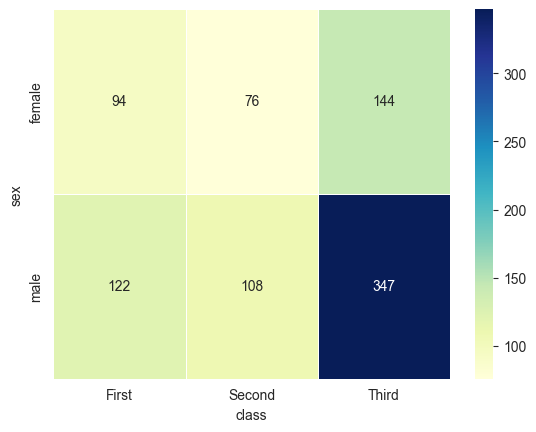

In [38]:
sns.heatmap(
    table,
    annot=True, # 숫자가 보임 
    fmt = 'd', # 숫자에 지수 나오면 지수 말고 숫자로 보여주는녀석 
    # format = 'd' # format으로는 안되고 fmt로 써야댐
    cmap='YlGnBu', # Yellow,Green, Blue
    # linewidths=50, # 떨궈주는 사이즈 
    linewidths=0.5, # 보통은 0.5 정도
    cbar = True # default True 오른쪽 color bar, 안보일라면 False
)
plt.show()

Theme : darkgrid, whitegrid, dark, white, ticks
sns의 내장 기본 5가지 theme

---
### 범주형 데이터의 산점도

In [48]:
sns.set_style('whitegrid')

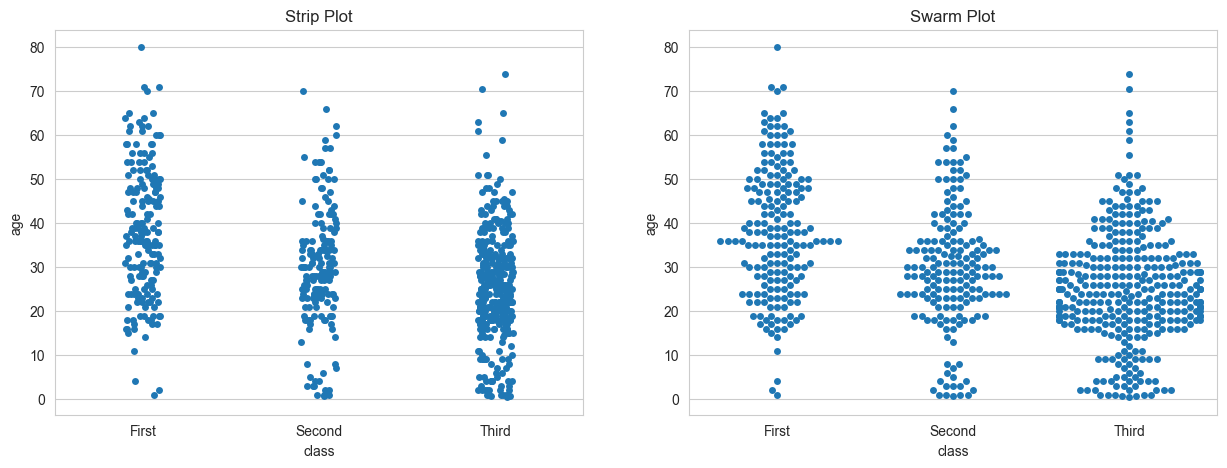

In [64]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax1,
)
sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax2,
)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()